Barebones mlflow artifacts logging. In this experiment , we will simply log the matplotlib figures.<br>

Execute this command in the gitbash command line to start the mlflow ui<br>
!python -m mlflow ui --backend-store-uri sqlite:///c:/users/arind/documents/mlflow/mlflow.db

In [15]:
#import dagshub
import mlflow
import os

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
mnist = tf.keras.datasets.mnist
train_data, test_data = mnist.load_data()

# Divide the data into features and labels.
train_images, train_labels = train_data
test_images, test_labels = test_data

# Reshape and normalize the images.
X_train = train_images.reshape((60000, 784))
X_train = X_train.astype('float32') / 255
X_test = test_images.reshape((10000, 784))
X_test = X_test.astype('float32') / 255

# Reshape the labels and encode them categorically.
y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

# Define the sequential model.
model = tf.keras.models.Sequential()

# Add two fully-connected layers to the network.
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [3]:
#os.getenv('MLFLOW_TRACKING_PASSWORD')

In [4]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("keras_log")

<Experiment: artifact_location='file:///C:/Users/arind/Documents/mlflow/mlruns/1', creation_time=1719678968343, experiment_id='1', last_update_time=1719678968343, lifecycle_stage='active', name='keras_log', tags={}>

In [5]:
# Define the parameters.
num_epochs = 10
batch_size = 256

# Train the model.
history = model.fit(X_train,
                      y_train,
                      epochs=num_epochs,
                      batch_size=batch_size,
                      validation_data=(X_test, y_test))

Epoch 1/10
235/235 [==============================] - 3s 5ms/step - loss: 0.3287 - accuracy: 0.9087 - val_loss: 0.1688 - val_accuracy: 0.9515
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1395 - accuracy: 0.9604 - val_loss: 0.1159 - val_accuracy: 0.9654
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0940 - accuracy: 0.9734 - val_loss: 0.0914 - val_accuracy: 0.9726
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0691 - accuracy: 0.9802 - val_loss: 0.0837 - val_accuracy: 0.9735
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0521 - accuracy: 0.9854 - val_loss: 0.0712 - val_accuracy: 0.9777
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0401 - accuracy: 0.9888 - val_loss: 0.0701 - val_accuracy: 0.9770
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0321 - accuracy: 0.9917 - val_loss: 0.0653 - val_accuracy: 0.9787
Epoch 

In [6]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0602 - accuracy: 0.9806
Test Accuracy: 0.9805999994277954
Test Loss: 0.06019257381558418


In [7]:
mlflow.log_metric("test_accuracy", test_accuracy)
mlflow.log_metric("test_loss", test_loss)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


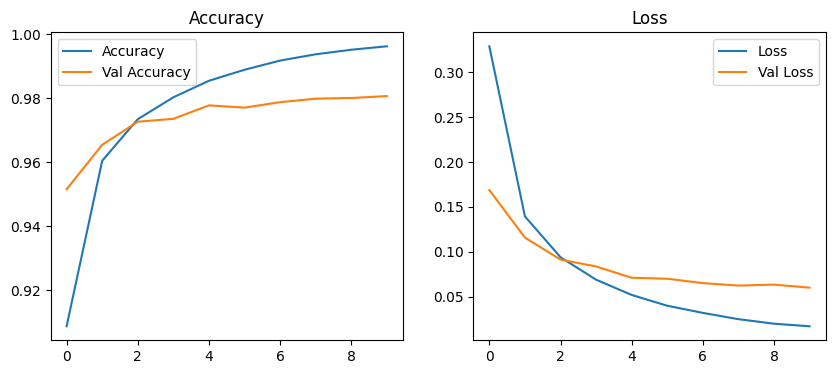

In [9]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(history.history['accuracy'], label='Accuracy' )
ax[0].plot(history.history['val_accuracy'], label='Val Accuracy' )
ax[0].set_title('Accuracy')
ax[0].legend(loc='best')
ax[1].plot(history.history['loss'], label='Loss' )
ax[1].plot(history.history['val_loss'], label='Val Loss' )
ax[1].set_title('Loss')
ax[1].legend(loc='best')

In [10]:
mlflow.log_figure(fig,'training_history.png')

In [13]:
y_test_int = np.argmax(y_test,axis = 1)
y_pred = model.predict(X_test)
y_pred_int = np.argmax(y_pred,axis = 1)

target_names = [str(i) for i in range(10)]
print(classification_report(y_test_int, y_pred_int,target_names=target_names))
clf_rpt = classification_report(y_test_int, y_pred_int,target_names=target_names, output_dict = True)

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



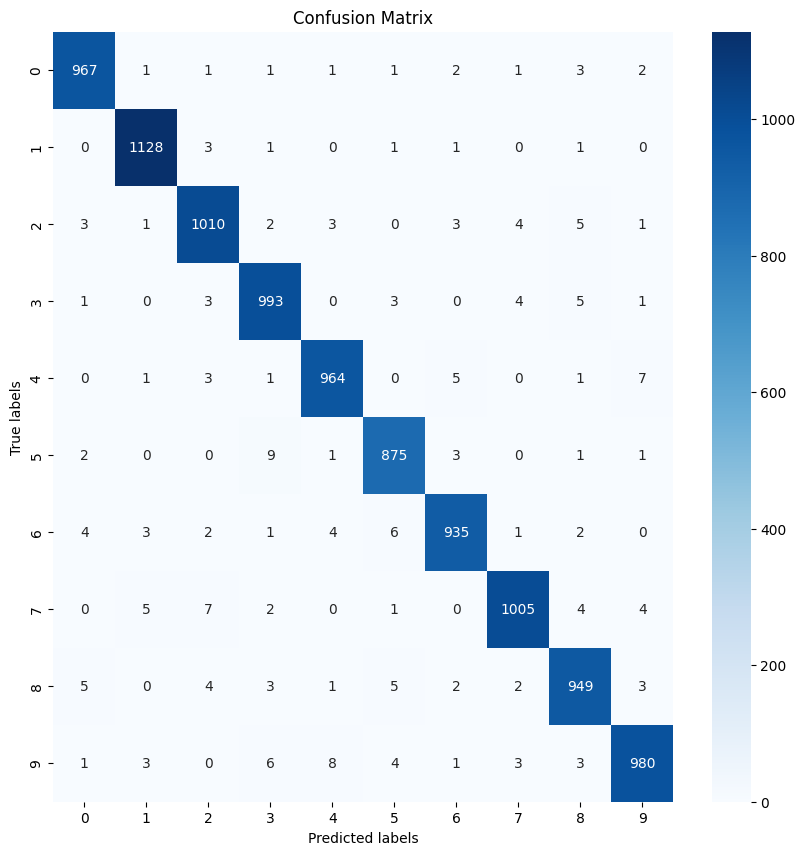

In [16]:
conf = confusion_matrix(y_test_int, y_pred_int, labels=[i for i in range(10)])

fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(conf, annot=True, fmt='g', ax=ax, cmap = plt.cm.Blues);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);
mlflow.log_figure(fig,'confusion_matrix.png')

In [17]:
mlflow.end_run()